In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv('/content/Swiggy data.csv')

In [3]:
dataset.head()

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,₹ 150
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,₹ 400
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,₹ 126
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,₹ 400
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,₹ 450


In [4]:
#finding null values.
dataset.isnull().sum()

Shop_Name       0
Cuisine         0
Location        0
Rating          0
Cost_for_Two    0
dtype: int64

In [5]:
#No null values are present in the dataset.

In [6]:
dataset.describe()

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
count,118,118,118,118,118
unique,115,79,65,13,30
top,La Pino'z Pizza,North Indian,"BTM, BTM",4.1,₹ 300
freq,2,12,13,30,16


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Shop_Name     118 non-null    object
 1   Cuisine       118 non-null    object
 2   Location      118 non-null    object
 3   Rating        118 non-null    object
 4   Cost_for_Two  118 non-null    object
dtypes: object(5)
memory usage: 4.7+ KB


In [8]:
dataset.duplicated().sum()

0

In [9]:
#No rows in the dataset are duplicated hence no need to remove them.

In [10]:
dataset.columns

Index(['Shop_Name', 'Cuisine', 'Location', 'Rating', 'Cost_for_Two'], dtype='object')

In [11]:
#We need to see values of Rating column to find why its datatype is object
#and not float.

In [12]:
dataset['Rating'].unique()

array(['4.3', '4.4', '4.1', '4.2', '3.9', '3.8', '4', '3.7', '3.6', '4.8',
       '4.5', '4.6', '--'], dtype=object)

In [13]:
#Rating column has a value as -- so we need to replace that value by 0.

In [14]:
dataset['Rating']=dataset['Rating'].str.replace('--','0').astype(float)

In [15]:
dataset['Rating'].unique()

array([4.3, 4.4, 4.1, 4.2, 3.9, 3.8, 4. , 3.7, 3.6, 4.8, 4.5, 4.6, 0. ])

In [16]:
dataset['Rating'].dtype

dtype('float64')

In [17]:
#So we successfully converted the Rating column into float datatype.

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Shop_Name     118 non-null    object 
 1   Cuisine       118 non-null    object 
 2   Location      118 non-null    object 
 3   Rating        118 non-null    float64
 4   Cost_for_Two  118 non-null    object 
dtypes: float64(1), object(4)
memory usage: 4.7+ KB


In [19]:
#now checking Cost_for_Two column.

In [20]:
dataset['Cost_for_Two'].unique()

array(['₹ 150', '₹ 400', '₹ 126', '₹ 450', '₹ 350', '₹ 200', '₹ 500',
       '₹ 247', '₹ 550', '₹ 300', '₹ 129', '₹ 250', '₹ 268', '₹ 600',
       '₹ 527', '₹ 130', '₹ 257', '₹ 280', '₹ 399', '₹ 220', '₹ 800',
       '₹ 100', '₹ 178', '₹ 120', '₹ 251', '₹ 650', '₹ 132', '₹ 153',
       '₹ 219', '₹ 193'], dtype=object)

In [21]:
#Due to symbol the datatype is object so we need to remove the symbol.

In [22]:
def remove(string):
  cost=string.split(' ')[1] #to get only no.
  return cost
#FUNCTION TO GET ONLY NUMERICAL PART.

In [23]:
dataset['Cost_for_Two']=dataset['Cost_for_Two'].apply(remove)
#applying remove function in cost_for_two column.

In [24]:
#changing datatype to integer.
dataset['Cost_for_Two']=dataset['Cost_for_Two'].astype('int')

In [25]:
dataset['Cost_for_Two'].unique()

array([150, 400, 126, 450, 350, 200, 500, 247, 550, 300, 129, 250, 268,
       600, 527, 130, 257, 280, 399, 220, 800, 100, 178, 120, 251, 650,
       132, 153, 219, 193])

In [26]:
dataset['Cost_for_Two'].dtype

dtype('int64')

In [27]:
#so we successfully converted the datatype into integer and also removed symbols.

In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Shop_Name     118 non-null    object 
 1   Cuisine       118 non-null    object 
 2   Location      118 non-null    object 
 3   Rating        118 non-null    float64
 4   Cost_for_Two  118 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 4.7+ KB


In [29]:
#changing column name Cost_for_Two to Cost_for_Two_In_₹.
dataset.rename(columns={'Cost_for_Two':'Cost_for_Two_In_₹'},inplace=True)

In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Shop_Name          118 non-null    object 
 1   Cuisine            118 non-null    object 
 2   Location           118 non-null    object 
 3   Rating             118 non-null    float64
 4   Cost_for_Two_In_₹  118 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 4.7+ KB


In [31]:
#The other column's datatypes need not be changed as thay are strings/characters.
#So preprocessing of dataset is completed.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


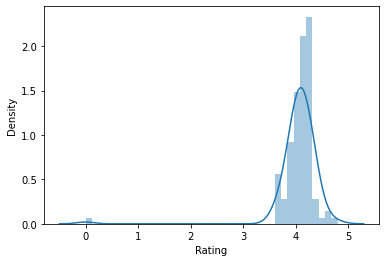

In [32]:
#Distibution Of Rating Column
sns.distplot(dataset['Rating'])

In [33]:
#Many ratings are 0 .
#We filter dataset so that Rating > 0.

In [34]:
df_Ratings = dataset[dataset['Rating'] > 0]
df_Ratings

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two_In_₹
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,150
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,400
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,126
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,400
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,450
...,...,...,...,...,...
113,Wok Paper Scissors,"Pan-Asian, Chinese, Asian","JNC Road, Koramangala",3.9,219
114,Savoury Restaurant,"Arabian, Middle Eastern, North Indian, Grill, ...","Madiwala, BTM",4.1,600
115,Royal Treat,"North Indian, Chinese, Seafood, Biryani","5th block Koramangala, Koramangala",4.2,193
116,Thali 99,North Indian,"Koramangala, Koramangala",4.3,200


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


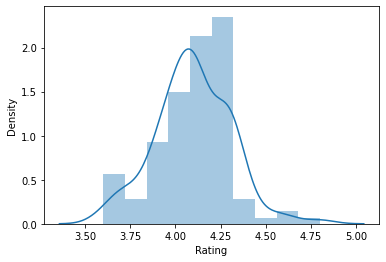

In [35]:
#Taking only rows having Rating>0.
sns.distplot(df_Ratings['Rating'])

In [36]:
dataset['Rating'].max()

4.8

In [37]:
#From the distribution plot we can see that More than 50% of Restaurants
#are having rating > 4.0.
#Maximum rating is 4.8
#So we conclude that 50% of restaurants are doing well.

In [38]:
#location column
dataset['Location'].unique()

array(['Koramangala, Koramangala', 'Sector 5, HSR',
       '6th Block, Koramangala', 'HSR, HSR', '5th Block, Koramangala',
       'Koramangala 4th  Block, Koramangala', 'BTM 2nd Stage, BTM',
       'BTM, BTM', '9th Main road, Koramangala', 'outer ring road, BTM',
       '7th Block, Koramangala', '1st MAin, Koramangala',
       'Bommanahalli, BTM', '6th block, Koramangala', 'Sector 4, HSR',
       'BTM 1st stage, BTM', 'Jakkasandra Extn, Koramangala',
       'Marutinagar Main Road, BTM', '1st Block, Koramangala',
       '4th Cross, BTM', 'koramangala, Koramangala', 'BTM 2nd stage, BTM',
       '3rd main, BTM', 'HSR 1st sector, HSR', 'Sector 7, HSR',
       '3rd Sector, HSR', 'Chocolate Factory Road, BTM',
       '16th Main Road, 2nd Stage, BTM', '1st Stage, BTM',
       'Hosur Main Road, Koramangala',
       '1st Cross Road, 5th Block, Near Jyothi Nivas College, Koramangala',
       'Mico Layout, BTM', '4th Cross, Koramangala',
       '4th Block, Koramangala', 'Intermediate Ring Road, K

In [39]:
#no. of unique values.
dataset['Location'].nunique()

65

In [40]:
#By observing the dataset we find repetitive words: Koramangala,HSR,BTM
#All the location names have added prefixes with the above repetitive words.

In [41]:
df_Koramangala=dataset[dataset['Location'].str.contains(r'Koramangala')]
df_Koramangala
#Getting rows with location containing string 'Koramangala'

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two_In_₹
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,150
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,126
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,450
5,Kitchens of Punjab,North Indian,"Koramangala 4th Block, Koramangala",4.2,350
9,Yumlane Pizza,"Pizzas, Italian, Mexican","9th Main road, Koramangala",3.8,150
...,...,...,...,...,...
112,Kritunga,"Andhra, Biryani","5th Block, Koramangala",3.9,500
113,Wok Paper Scissors,"Pan-Asian, Chinese, Asian","JNC Road, Koramangala",3.9,219
115,Royal Treat,"North Indian, Chinese, Seafood, Biryani","5th block Koramangala, Koramangala",4.2,193
116,Thali 99,North Indian,"Koramangala, Koramangala",4.3,200


In [42]:
df_BTM=dataset[dataset['Location'].str.contains(r'BTM')]
df_BTM
#Getting rows with location containing string 'BTM'

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two_In_₹
6,99 VARIETY DOSA AND PAV BHAJI- Malli Mane Food...,"Fast Food, North Indian, Chinese","BTM 2nd Stage, BTM",4.1,200
7,La Pino'z Pizza,Italian,"BTM, BTM",3.9,500
10,Ambur Star Briyani,"Chinese, South Indian, North Indian, Desserts,...","outer ring road, BTM",4.1,500
17,Sri Lakshmi Dhaba,North Indian,"Bommanahalli, BTM",3.7,200
20,Just Bake - Cakes & confectioners,"Desserts, Bakery","BTM 1st stage, BTM",4.3,300
22,Hotel Godavari,"North Indian, Chinese, Hyderabadi","Marutinagar Main Road, BTM",4.0,400
25,Swad Punjab da,Indian,"BTM, BTM",4.1,250
27,High N Hungry,"Andhra, Biryani, Chinese, Desserts, Fast Food,...","4th Cross, BTM",4.1,350
31,Bengali Fun Foods,North Indian,"BTM 2nd stage, BTM",4.2,300
33,Oottupura,"Kerala, South Indian","BTM, BTM",4.3,268


In [43]:
df_HSR=dataset[dataset['Location'].str.contains(r'HSR')]
df_HSR
#Getting rows with location containing string 'HSR'

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two_In_₹
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,400
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,400
8,Hotel Manu,"South Indian, Kerala, Chinese, North Indian","HSR, HSR",4.1,350
19,Shree Khana Khazana,"Indian, Rajasthani","Sector 4, HSR",4.1,350
24,New Udupi Grand,"Chinese, Jain, North Indian, South Indian","HSR, HSR",4.3,150
36,Biriyani Zone,"North Indian, Chinese, Biryani","HSR 1st sector, HSR",4.1,600
37,Gongura's,"North Indian, Chinese, Biryani","Sector 7, HSR",3.8,300
39,Leon Grill,"Turkish, Portuguese, American","3rd Sector, HSR",4.3,300
41,Cakewala,Desserts,"HSR, HSR",4.3,450
57,Donne Biriyani House,South Indian,"3rd sector, HSR",4.0,300


In [44]:
dataset['Location'].nunique()

65

In [45]:
df_Koramangala.shape

(64, 5)

In [46]:
df_BTM.shape

(35, 5)

In [47]:
df_HSR.shape

(18, 5)

In [48]:
64+35+18

117

In [49]:
#So we can see Restaurants are divided or located into 3 locations.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


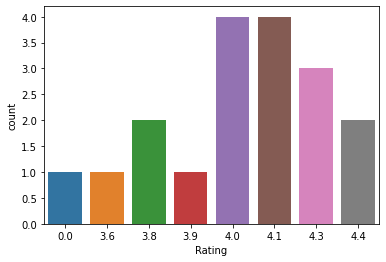

In [50]:
#Plotting graphs for different locations.
#HSR Area
sns.countplot(df_HSR['Rating'])

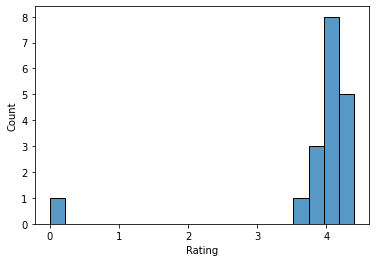

In [51]:
sns.histplot(df_HSR['Rating'],bins=20)

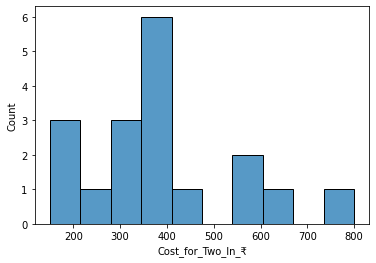

In [52]:
sns.histplot(df_HSR['Cost_for_Two_In_₹'],bins=10)

In [53]:
#From the histogram and countplots above we find that most places in HSR location
#rating of 4 or more. Cost for 2 people lies between 200 to 400.
#Maximum cost is nearly upto 800.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


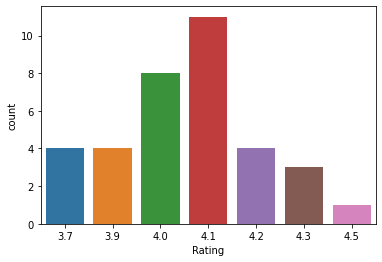

In [54]:
#BTM Area
sns.countplot(df_BTM['Rating'])

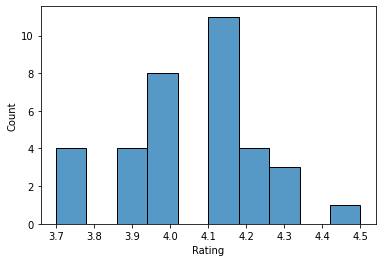

In [55]:
sns.histplot(df_BTM['Rating'],bins=10)

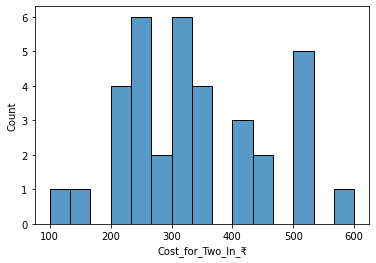

In [56]:
sns.histplot(df_BTM['Cost_for_Two_In_₹'],bins=15)

In [57]:
#Most places in the BTM location have rating from 4.0 to 4.2 and approximate cost for
#2 people between 200 to 400.
#Maximum cost is upto 600.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


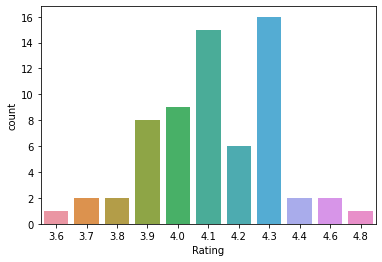

In [58]:
#Koramangala Area
sns.countplot(df_Koramangala['Rating'])

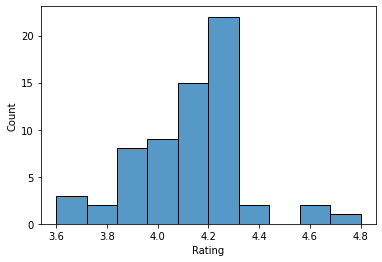

In [59]:
sns.histplot(df_Koramangala['Rating'],bins=10)

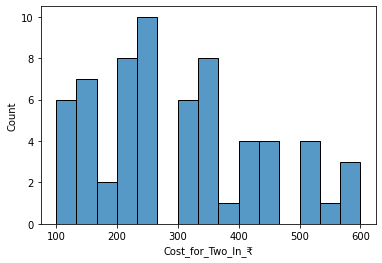

In [60]:
sns.histplot(df_Koramangala['Cost_for_Two_In_₹'],bins=15)

In [61]:
#Most places in the Koramangala area have 4.1 to 4.4 rating and cost for 2 people
#lies between 200 to 400.
#Maximum cost goes upto 600.

In [62]:
#Most Costly or Expensive location is HSR as maximum cost there is nearly 800.

In [63]:
#Cuisine Analysis
dataset['Cuisine']=dataset['Cuisine'].str.title()
dataset['Cuisine']

0                                                 Sweets
1                 North Indian, Home Food, Thalis, Combo
2      South Indian, North Indian, Fast Food, Beverag...
3      American, Arabian, Chinese, Desserts, Fast Foo...
4                                          Chinese, Thai
                             ...                        
113                            Pan-Asian, Chinese, Asian
114    Arabian, Middle Eastern, North Indian, Grill, ...
115              North Indian, Chinese, Seafood, Biryani
116                                         North Indian
117                                      Andhra, Biryani
Name: Cuisine, Length: 118, dtype: object

In [64]:
dataset.columns

Index(['Shop_Name', 'Cuisine', 'Location', 'Rating', 'Cost_for_Two_In_₹'], dtype='object')

In [65]:
dataset['Cuisine'].unique() #unique values in Cuisine column

array(['Sweets', 'North Indian, Home Food, Thalis, Combo',
       'South Indian, North Indian, Fast Food, Beverages, Jain',
       'American, Arabian, Chinese, Desserts, Fast Food, Mughlai, North Indian',
       'Chinese, Thai', 'North Indian',
       'Fast Food, North Indian, Chinese', 'Italian',
       'South Indian, Kerala, Chinese, North Indian',
       'Pizzas, Italian, Mexican',
       'Chinese, South Indian, North Indian, Desserts, Fast Food, Kerala, Andhra, Beverages, Mughlai, Seafood',
       'Desserts', 'Chinese, Andhra, Biryani, Seafood', 'Chinese',
       'South Indian, Chinese, Desserts, North Indian',
       'Arabian, Fast Food', 'Desserts, Beverages', 'Indian, Rajasthani',
       'Desserts, Bakery', 'Chinese, Healthy Food, North Indian',
       'North Indian, Chinese, Hyderabadi', 'Fast Food',
       'Chinese, Jain, North Indian, South Indian', 'Indian',
       'North Indian, South Indian, Chinese',
       'Andhra, Biryani, Chinese, Desserts, Fast Food, Seafood, South In

In [66]:
frequency={}
for i in dataset['Cuisine'].unique():
  cuisine_list=i.split(',')
  for cuisine in cuisine_list:
    cuisine=cuisine.lstrip(' ')
    if cuisine in frequency:
      frequency[cuisine]=frequency[cuisine]+1
    else:
      frequency[cuisine]=1
print(frequency)
print()
#counting frequency of unique values in the Cuisine column.
print('TOTAL RECORDS: \t',len(frequency))

{'Sweets': 2, 'North Indian': 32, 'Home Food': 2, 'Thalis': 1, 'Combo': 1, 'South Indian': 23, 'Fast Food': 16, 'Beverages': 9, 'Jain': 2, 'American': 8, 'Arabian': 4, 'Chinese': 35, 'Desserts': 15, 'Mughlai': 7, 'Thai': 2, 'Italian': 4, 'Kerala': 6, 'Pizzas': 5, 'Mexican': 3, 'Andhra': 12, 'Seafood': 8, 'Biryani': 18, 'Indian': 5, 'Rajasthani': 1, 'Bakery': 2, 'Healthy Food': 4, 'Hyderabadi': 5, 'Snacks': 4, 'Turkish': 2, 'Portuguese': 2, 'Chaat': 2, 'Asian': 3, 'Continental': 3, 'Mediterranean': 1, 'Lebanese': 1, 'Cafe': 2, 'Salads': 2, 'Pastas': 1, 'Punjabi': 2, 'Juices': 2, 'Kebabs': 2, 'Grill': 2, 'Ice Cream': 2, 'Tandoor': 1, 'Chettinad': 2, 'Pan-Asian': 2, 'Oriental': 1, 'Middle Eastern': 1}

TOTAL RECORDS: 	 48


In [67]:
frequency.items()
#printing dictionary having items and their count.

dict_items([('Sweets', 2), ('North Indian', 32), ('Home Food', 2), ('Thalis', 1), ('Combo', 1), ('South Indian', 23), ('Fast Food', 16), ('Beverages', 9), ('Jain', 2), ('American', 8), ('Arabian', 4), ('Chinese', 35), ('Desserts', 15), ('Mughlai', 7), ('Thai', 2), ('Italian', 4), ('Kerala', 6), ('Pizzas', 5), ('Mexican', 3), ('Andhra', 12), ('Seafood', 8), ('Biryani', 18), ('Indian', 5), ('Rajasthani', 1), ('Bakery', 2), ('Healthy Food', 4), ('Hyderabadi', 5), ('Snacks', 4), ('Turkish', 2), ('Portuguese', 2), ('Chaat', 2), ('Asian', 3), ('Continental', 3), ('Mediterranean', 1), ('Lebanese', 1), ('Cafe', 2), ('Salads', 2), ('Pastas', 1), ('Punjabi', 2), ('Juices', 2), ('Kebabs', 2), ('Grill', 2), ('Ice Cream', 2), ('Tandoor', 1), ('Chettinad', 2), ('Pan-Asian', 2), ('Oriental', 1), ('Middle Eastern', 1)])

In [68]:
cuisine_keys=frequency.keys()
freq=frequency.values()

In [69]:
df_Cuisine_Analysis=pd.DataFrame()

In [70]:
df_Cuisine_Analysis['Cuisine']=cuisine_keys
df_Cuisine_Analysis['Count']=freq
#adding in datafrfame

In [71]:
df_Cuisine_Analysis

,Cuisine,Count
0,Sweets,2
1,North Indian,32
2,Home Food,2
3,Thalis,1
4,Combo,1
5,South Indian,23
6,Fast Food,16
7,Beverages,9
8,Jain,2
9,American,8


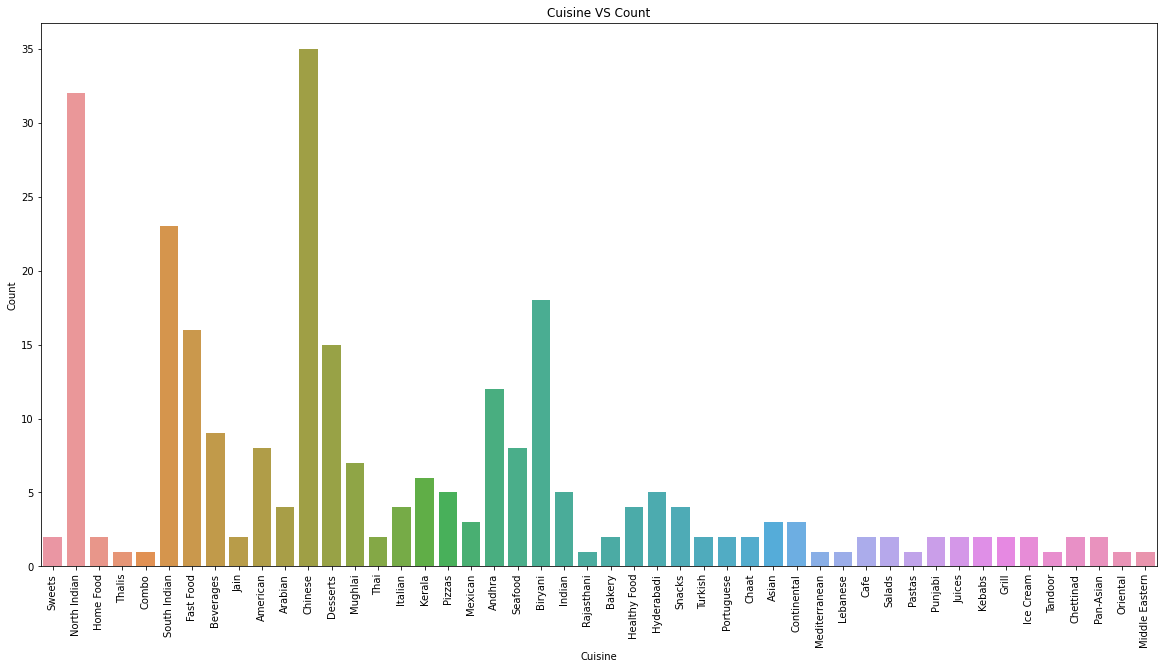

In [72]:
plt.figure(figsize=(20,10))
sns.barplot(x=df_Cuisine_Analysis['Cuisine'],y=df_Cuisine_Analysis['Count'],data=df_Cuisine_Analysis)
plt.xticks(rotation=90)
plt.title('Cuisine VS Count')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.show()

In [73]:
#So the most famous Cuisine is Chinese followed by North Indian and South Indian.

In [74]:
#Cuisines Location wise Analysis

In [75]:
df_BTM['Cuisine'].unique()

array(['Fast Food, North Indian, Chinese', 'Italian',
       'Chinese, South Indian, North Indian, Desserts, Fast Food, Kerala, Andhra, Beverages, Mughlai, Seafood',
       'North Indian', 'Desserts, Bakery',
       'North Indian, Chinese, Hyderabadi', 'Indian',
       'Andhra, Biryani, Chinese, Desserts, Fast Food, Seafood, South Indian',
       'Kerala, South Indian', 'North Indian, Chinese, Biryani',
       'Biryani', 'South Indian, Snacks, North Indian, Chinese',
       'Desserts, Fast Food, Sweets, Chaat',
       'Chinese, South Indian, Andhra, Hyderabadi',
       'North Indian, Chinese, South Indian',
       'Biryani, Andhra, South Indian', 'Fast Food, Beverages',
       'Beverages, Chinese', 'Kerala, Chinese', 'North Indian, Chinese',
       'Arabian, Beverages, Biryani, Chinese, Desserts, North Indian',
       'North Indian, South Indian', 'Chinese, Thai',
       'Chinese, Hyderabadi, Biryani, Indian, South Indian, Andhra, Tandoor',
       'Punjabi, North Indian, Chinese, Fast 

In [76]:
freq_BTM = {}
for i in df_BTM['Cuisine'].unique():
    Cuisine_List = i.split(',')
    for Cuisine in Cuisine_List:
        Cuisine = Cuisine.lstrip()
        if Cuisine in freq_BTM:
            freq_BTM[Cuisine] = freq_BTM[Cuisine] + 1
        else:
            freq_BTM[Cuisine] = 1
            
print(freq_BTM)
print()
print(len(freq_BTM))
#COUNTING CUISINES IN BTM LOCATION.

{'Fast Food': 6, 'North Indian': 16, 'Chinese': 18, 'Italian': 1, 'South Indian': 10, 'Desserts': 6, 'Kerala': 4, 'Andhra': 7, 'Beverages': 4, 'Mughlai': 3, 'Seafood': 3, 'Bakery': 1, 'Hyderabadi': 4, 'Indian': 2, 'Biryani': 8, 'Snacks': 1, 'Sweets': 1, 'Chaat': 1, 'Arabian': 2, 'Thai': 1, 'Tandoor': 1, 'Punjabi': 1, 'Healthy Food': 1, 'Chettinad': 1, 'Middle Eastern': 1, 'Grill': 1}

26


In [77]:
freq_BTM.items()

dict_items([('Fast Food', 6), ('North Indian', 16), ('Chinese', 18), ('Italian', 1), ('South Indian', 10), ('Desserts', 6), ('Kerala', 4), ('Andhra', 7), ('Beverages', 4), ('Mughlai', 3), ('Seafood', 3), ('Bakery', 1), ('Hyderabadi', 4), ('Indian', 2), ('Biryani', 8), ('Snacks', 1), ('Sweets', 1), ('Chaat', 1), ('Arabian', 2), ('Thai', 1), ('Tandoor', 1), ('Punjabi', 1), ('Healthy Food', 1), ('Chettinad', 1), ('Middle Eastern', 1), ('Grill', 1)])

In [78]:
Cuisine = freq_BTM.keys()
freq = freq_BTM.values()

In [79]:
dict_BTM = {
    'Cuisine' : Cuisine,
    'Count' : freq
}

df_Cuisine_BTM = pd.DataFrame(dict_BTM)
df_Cuisine_BTM.head()

,Cuisine,Count
0,Fast Food,6
1,North Indian,16
2,Chinese,18
3,Italian,1
4,South Indian,10


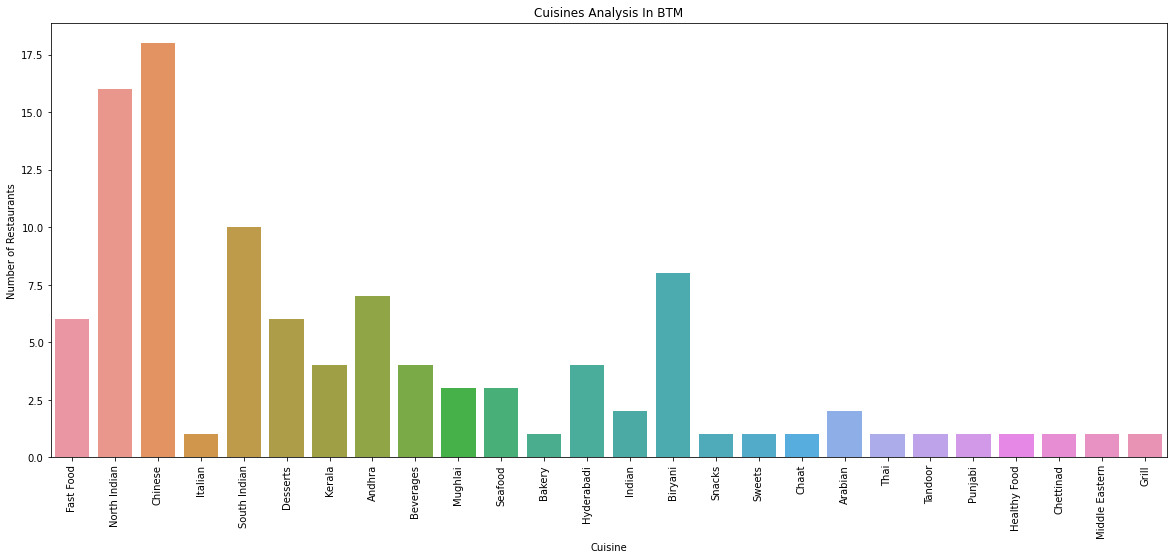

In [80]:
plt.figure(figsize = (20, 8))
sns.barplot(x = df_Cuisine_BTM['Cuisine'], 
            y = df_Cuisine_BTM['Count'], 
            data = df_Cuisine_BTM)
plt.xticks(rotation = 90)
plt.title('Cuisines Analysis In BTM')
plt.xlabel('Cuisine')
plt.ylabel('Number of Restaurants')
plt.show()

In [81]:
#IN BTM Area , most restaurants sell Chinese and North Indian which are the most
#famous here.
#So most people are fond of the Chinese cuisines.

In [82]:
#HSR Area
df_HSR['Cuisine'].unique()

array(['North Indian, Home Food, Thalis, Combo',
       'American, Arabian, Chinese, Desserts, Fast Food, Mughlai, North Indian',
       'South Indian, Kerala, Chinese, North Indian',
       'Indian, Rajasthani', 'Chinese, Jain, North Indian, South Indian',
       'North Indian, Chinese, Biryani', 'Turkish, Portuguese, American',
       'Desserts', 'South Indian', 'Andhra, Biryani', 'Desserts, Bakery',
       'Biryani, Juices, Kebabs', 'North Indian', 'Biryani',
       'Snacks, American', 'Chettinad, South Indian'], dtype=object)

In [83]:
freq_HSR = {}
for i in df_HSR['Cuisine'].unique():
    Cuisine_List = i.split(',')
    for Cuisine in Cuisine_List:
        Cuisine = Cuisine.lstrip()
        if Cuisine in freq_HSR:
            freq_HSR[Cuisine] = freq_HSR[Cuisine] + 1
        else:
            freq_HSR[Cuisine] = 1
            
print(freq_HSR)
print()
print(len(freq_HSR))

{'North Indian': 6, 'Home Food': 1, 'Thalis': 1, 'Combo': 1, 'American': 3, 'Arabian': 1, 'Chinese': 4, 'Desserts': 3, 'Fast Food': 1, 'Mughlai': 1, 'South Indian': 4, 'Kerala': 1, 'Indian': 1, 'Rajasthani': 1, 'Jain': 1, 'Biryani': 4, 'Turkish': 1, 'Portuguese': 1, 'Andhra': 1, 'Bakery': 1, 'Juices': 1, 'Kebabs': 1, 'Snacks': 1, 'Chettinad': 1}

24


In [84]:
freq_HSR.items()

dict_items([('North Indian', 6), ('Home Food', 1), ('Thalis', 1), ('Combo', 1), ('American', 3), ('Arabian', 1), ('Chinese', 4), ('Desserts', 3), ('Fast Food', 1), ('Mughlai', 1), ('South Indian', 4), ('Kerala', 1), ('Indian', 1), ('Rajasthani', 1), ('Jain', 1), ('Biryani', 4), ('Turkish', 1), ('Portuguese', 1), ('Andhra', 1), ('Bakery', 1), ('Juices', 1), ('Kebabs', 1), ('Snacks', 1), ('Chettinad', 1)])

In [85]:
Cuisine = freq_HSR.keys()
freq = freq_HSR.values()

In [86]:
dict_HSR = {
    'Cuisine' : Cuisine,
    'Count' : freq
}

df_Cuisine_HSR = pd.DataFrame(dict_HSR)
df_Cuisine_HSR.head()

,Cuisine,Count
0,North Indian,6
1,Home Food,1
2,Thalis,1
3,Combo,1
4,American,3


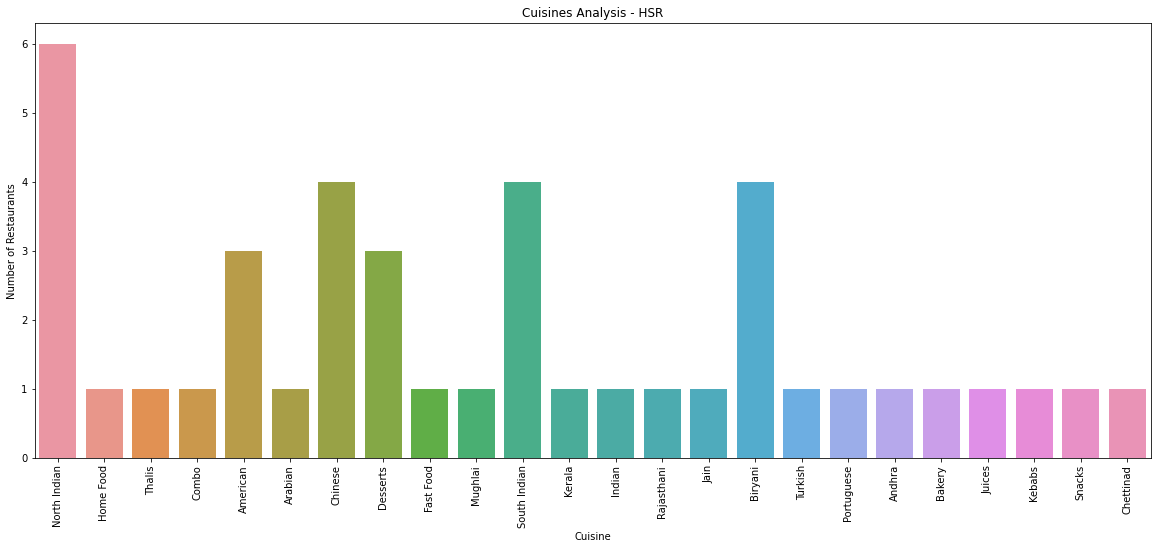

In [87]:
plt.figure(figsize = (20, 8))
sns.barplot(x = df_Cuisine_HSR['Cuisine'], 
            y = df_Cuisine_HSR['Count'], 
            data = df_Cuisine_HSR)
plt.xticks(rotation = 90)
plt.title('Cuisines Analysis - HSR')
plt.xlabel('Cuisine')
plt.ylabel('Number of Restaurants')
plt.show()

In [88]:
#In HSR Area , the North Indian food is the most famous/has the most count/found in the
#most no. of restaurants.
#So most people are fond of the North Indian cuisines.

In [89]:
#Koramangala Area
df_Koramangala['Cuisine'].unique()

array(['Sweets', 'South Indian, North Indian, Fast Food, Beverages, Jain',
       'Chinese, Thai', 'North Indian', 'Pizzas, Italian, Mexican',
       'Desserts', 'Chinese, Andhra, Biryani, Seafood', 'Chinese',
       'South Indian, Chinese, Desserts, North Indian',
       'Arabian, Fast Food', 'Desserts, Beverages',
       'Chinese, Healthy Food, North Indian', 'Fast Food',
       'North Indian, South Indian, Chinese', 'American, Fast Food',
       'Biryani, Seafood, North Indian, Chinese, Desserts, Andhra, South Indian',
       'Snacks, American', 'South Indian', 'Mexican', 'Pizzas, Fast Food',
       'Biryani, Mughlai, South Indian', 'Chinese, Asian',
       'Italian, Desserts, Pizzas',
       'Chinese, Continental, Italian, Mediterranean, Thai, Lebanese, American, Asian, Beverages, Bakery, Biryani, Cafe, Desserts, Healthy Food, Mexican, North Indian, Salads, Pizzas',
       'Biryani',
       'Pizzas, Chinese, Pastas, Salads, American, Continental',
       'Chinese, South Indian, Nor

In [90]:
freq_Koramangala = {}
for i in df_Koramangala['Cuisine'].unique():
    Cuisine_List = i.split(',')
    for Cuisine in Cuisine_List:
        Cuisine = Cuisine.lstrip()
        if Cuisine in freq_Koramangala:
            freq_Koramangala[Cuisine] = freq_Koramangala[Cuisine] + 1
        else:
            freq_Koramangala[Cuisine] = 1
            
print(freq_Koramangala)
print()
print(len(freq_Koramangala))

{'Sweets': 1, 'South Indian': 11, 'North Indian': 14, 'Fast Food': 9, 'Beverages': 5, 'Jain': 1, 'Chinese': 15, 'Thai': 2, 'Pizzas': 5, 'Italian': 4, 'Mexican': 3, 'Desserts': 8, 'Andhra': 5, 'Biryani': 10, 'Seafood': 5, 'Arabian': 1, 'Healthy Food': 3, 'American': 6, 'Snacks': 3, 'Mughlai': 3, 'Asian': 3, 'Continental': 3, 'Mediterranean': 1, 'Lebanese': 1, 'Bakery': 1, 'Cafe': 2, 'Salads': 2, 'Pastas': 1, 'Punjabi': 1, 'Hyderabadi': 1, 'Kerala': 1, 'Turkish': 1, 'Portuguese': 1, 'Grill': 1, 'Home Food': 1, 'Indian': 2, 'Ice Cream': 2, 'Juices': 1, 'Chaat': 1, 'Kebabs': 1, 'Pan-Asian': 2, 'Oriental': 1}

42


In [91]:
Cuisine = freq_Koramangala.keys()
freq = freq_Koramangala.values()

In [92]:
dict_Koramangala = {
    'Cuisine' : Cuisine,
    'Count' : freq
}
df_Cuisine_Koramangala = pd.DataFrame(dict_Koramangala)
df_Cuisine_Koramangala.head()

,Cuisine,Count
0,Sweets,1
1,South Indian,11
2,North Indian,14
3,Fast Food,9
4,Beverages,5


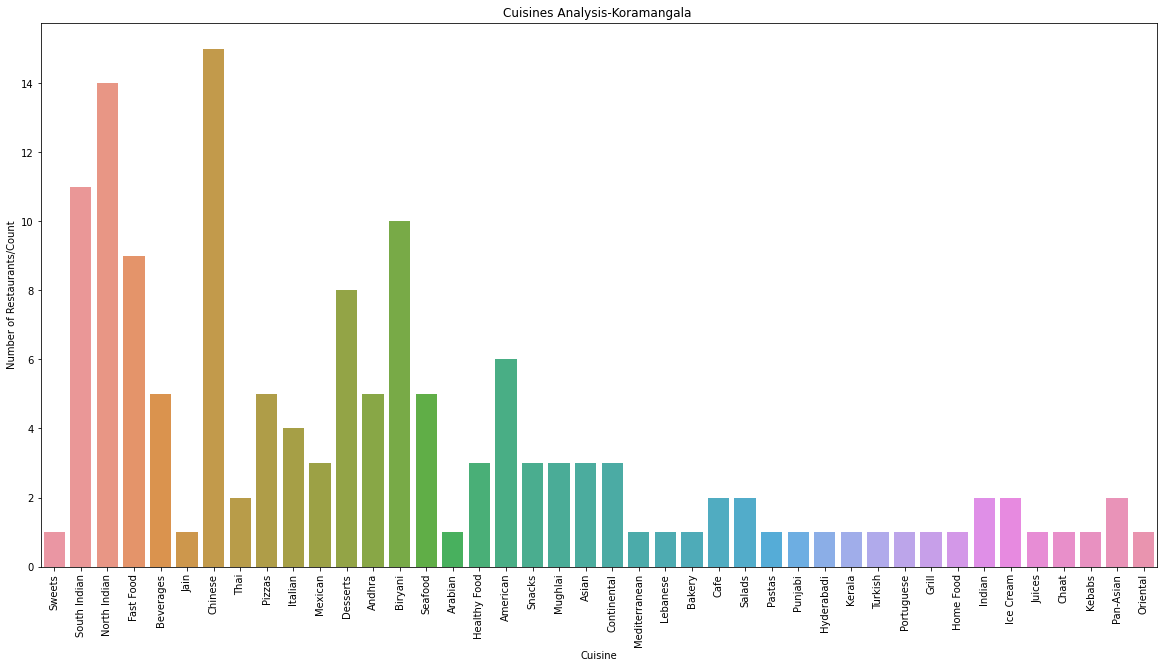

In [93]:
plt.figure(figsize = (20, 10))
sns.barplot(x = df_Cuisine_Koramangala['Cuisine'], 
            y = df_Cuisine_Koramangala['Count'], 
            data = df_Cuisine_Koramangala)
plt.xticks(rotation = 90)
plt.title('Cuisines Analysis-Koramangala ')
plt.xlabel('Cuisine')
plt.ylabel('Number of Restaurants/Count')
plt.show()

In [94]:
#In Koramangala Area, Chinese is found in most no. of restaurants followed by North
#Indian.
#So most people are fond of the Chinese cuisines.

In [95]:
#Analyzing the affordable and highest Rated resturants.
#Affordable restaurants have cost for 2 <= 500 and rating>=4.
df_affordable = dataset[(dataset['Cost_for_Two_In_₹'] <= 500) & (dataset['Rating'] >= 4.0)]
df_affordable

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two_In_₹
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,150
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,400
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,126
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,400
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,450
...,...,...,...,...,...
110,Biryani Pot,"North Indian, Biryani","Madiwala Junction, BTM",4.0,500
111,Bowl 99,"North Indian, South Indian","kormangala, Koramangala",4.4,200
115,Royal Treat,"North Indian, Chinese, Seafood, Biryani","5th block Koramangala, Koramangala",4.2,193
116,Thali 99,North Indian,"Koramangala, Koramangala",4.3,200


In [96]:
df_affordable = df_affordable.groupby(['Shop_Name', 'Rating'])['Cost_for_Two_In_₹'].agg('mean')
df_affordable = df_affordable.reset_index()
df_affordable

,Shop_Name,Rating,Cost_for_Two_In_₹
0,99 VARIETY DOSA AND JUICE-Malli mane food court,4.1,100.0
1,99 VARIETY DOSA AND PAV BHAJI- Malli Mane Food...,4.1,200.0
2,A2B - Adyar Ananda Bhavan,4.2,450.0
3,Abhiruchi Hotel,4.0,250.0
4,Al Daaz,4.4,400.0
...,...,...,...
76,Venu's Donne Biryani,4.3,300.0
77,WarmOven Cake & Desserts,4.1,200.0
78,World of asia,4.0,250.0
79,XO Belgian Waffle,4.3,250.0


In [97]:
df_affordable.sort_values(by = ['Rating'], ascending = False, inplace = True)
df_affordable

,Shop_Name,Rating,Cost_for_Two_In_₹
41,Khichdi Experiment,4.8,200.0
54,Natural Ice Cream,4.6,150.0
21,Corner House Ice Cream,4.6,250.0
20,Chinese Bae,4.5,450.0
50,Mumbai Tiffin,4.4,400.0
...,...,...,...
55,New Tasty Cafeteria,4.0,350.0
53,Nandhana Palace,4.0,500.0
52,Nanda's,4.0,400.0
45,Maa Di Hatti,4.0,129.0


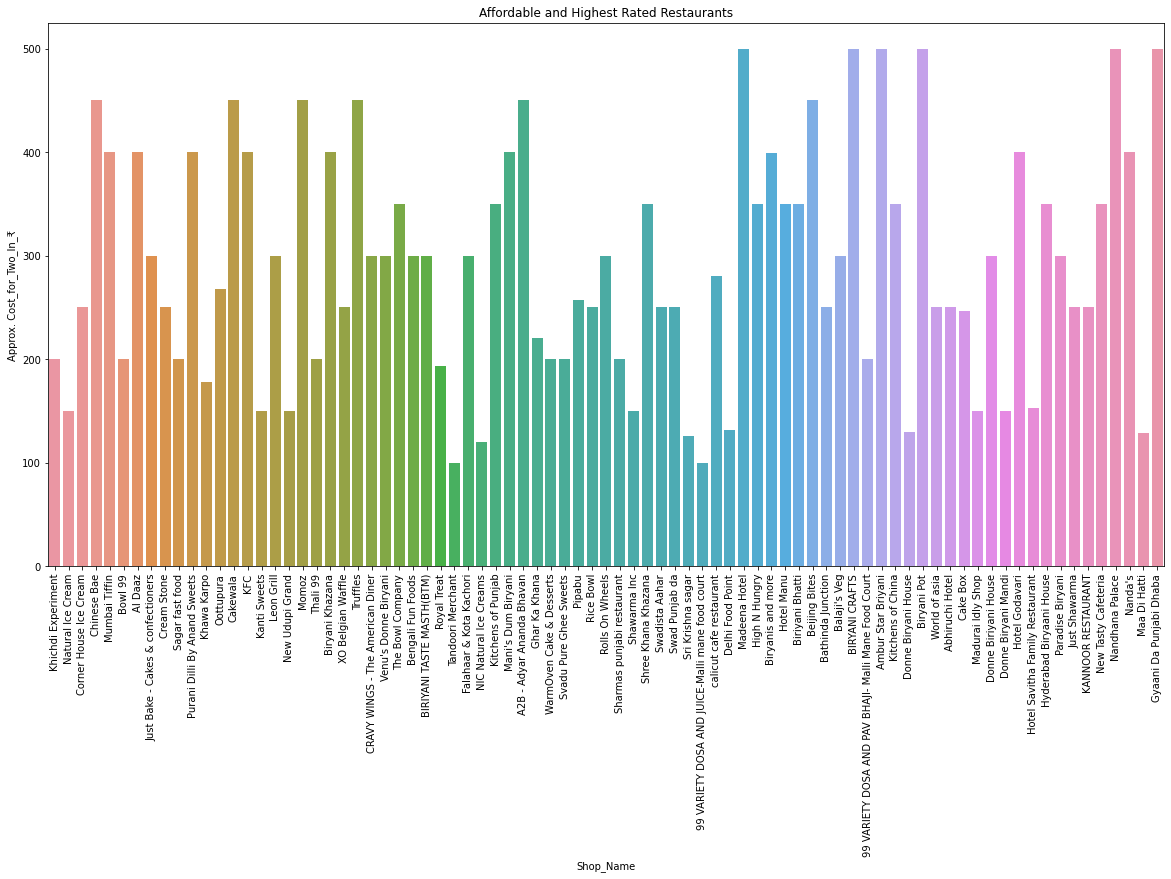

In [98]:
plt.figure(figsize = (20, 10))
sns.barplot(x = df_affordable['Shop_Name'], y = df_affordable['Cost_for_Two_In_₹'],
           data = df_affordable)
plt.title('Affordable and Highest Rated Restaurants')
plt.xlabel('Shop_Name')
plt.ylabel('Approx. Cost_for_Two_In_₹')
plt.xticks(rotation = 90)
plt.show()

In [99]:
#So,the most affordable hotels are Madeena Hotel,Biryani Crafts,Ambur Star Biryani
#and Biryani Pot etc.

In [100]:
#TOP 5 Cheapest and highest rated restaurants with approx. cost for 2 people.
df_cheapest=df_affordable.sort_values(by='Cost_for_Two_In_₹',ascending=True)
df_cheapest

,Shop_Name,Rating,Cost_for_Two_In_₹
72,Tandoori Merchant,4.2,100.0
0,99 VARIETY DOSA AND JUICE-Malli mane food court,4.1,100.0
51,NIC Natural Ice Creams,4.2,120.0
68,Sri Krishna sagar,4.1,126.0
45,Maa Di Hatti,4.0,129.0
...,...,...,...
5,Ambur Star Briyani,4.1,500.0
7,BIRYANI CRAFTS,4.1,500.0
53,Nandhana Palace,4.0,500.0
46,Madeena Hotel,4.1,500.0


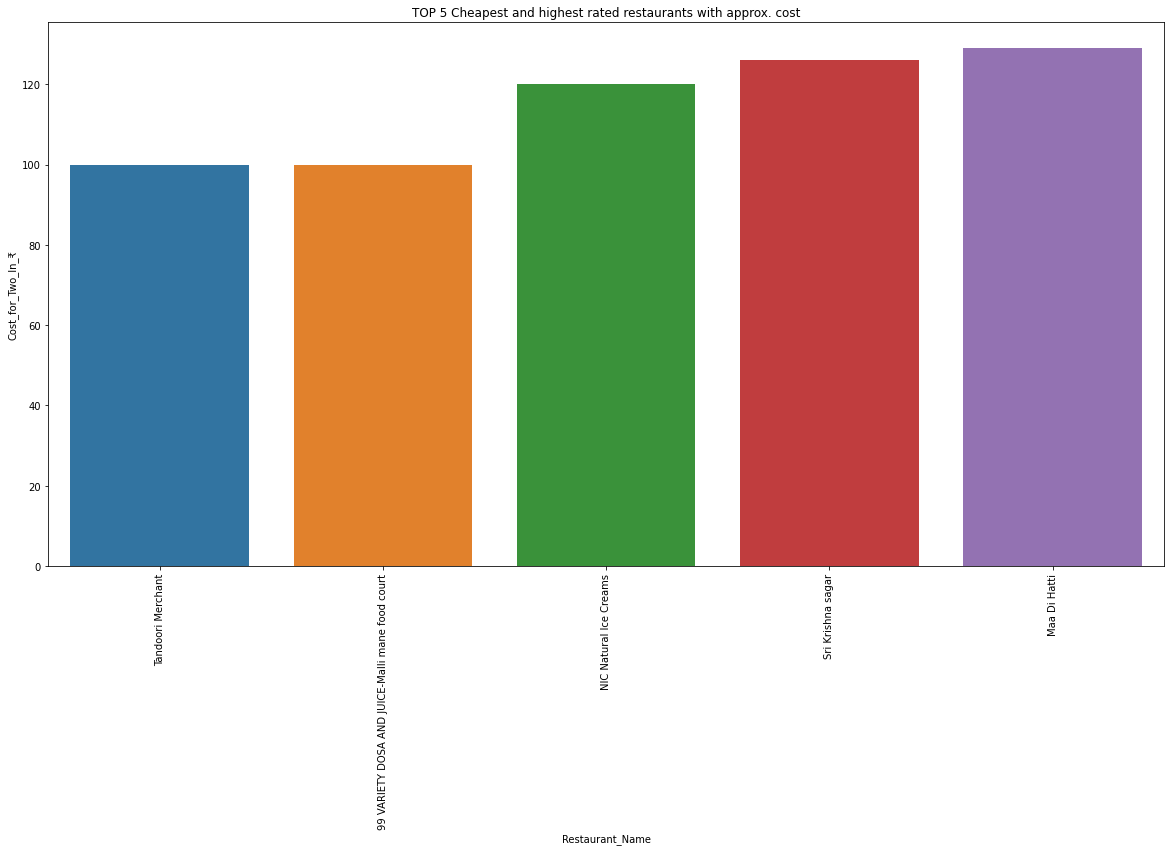

In [101]:
plt.figure(figsize = (20, 10))
sns.barplot(x = df_cheapest['Shop_Name'][0:5], y = df_cheapest['Cost_for_Two_In_₹'][0:5],
           data = df_affordable)
plt.title('TOP 5 Cheapest and highest rated restaurants with approx. cost')
plt.xlabel('Restaurant_Name')
plt.ylabel('Cost_for_Two_In_₹')
plt.xticks(rotation = 90)
plt.show()

In [102]:
#The cheapest restaurant is Tandoori Merchant and 99 Variety DOSA AND JUICE-Malli Mane food court.

In [103]:
#TOP 5 expensive and highest rated restaurants vs cost for 2 people.
df_Highest_Rated_Restaurants = dataset[dataset['Rating'] >= 4.0]
df_Highest_Rated_Restaurants

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two_In_₹
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,150
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,400
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,126
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,400
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,450
...,...,...,...,...,...
111,Bowl 99,"North Indian, South Indian","kormangala, Koramangala",4.4,200
114,Savoury Restaurant,"Arabian, Middle Eastern, North Indian, Grill, ...","Madiwala, BTM",4.1,600
115,Royal Treat,"North Indian, Chinese, Seafood, Biryani","5th block Koramangala, Koramangala",4.2,193
116,Thali 99,North Indian,"Koramangala, Koramangala",4.3,200


In [104]:
df_Highest_Rated_Restaurants = df_Highest_Rated_Restaurants.loc[:, ['Shop_Name', 'Rating', 'Cost_for_Two_In_₹']]
df_Highest_Rated_Restaurants

,Shop_Name,Rating,Cost_for_Two_In_₹
0,Kanti Sweets,4.3,150
1,Mumbai Tiffin,4.4,400
2,Sri Krishna sagar,4.1,126
3,Al Daaz,4.4,400
4,Beijing Bites,4.1,450
...,...,...,...
111,Bowl 99,4.4,200
114,Savoury Restaurant,4.1,600
115,Royal Treat,4.2,193
116,Thali 99,4.3,200


In [105]:
df_Highest_Rated_Restaurants = df_Highest_Rated_Restaurants.groupby(['Shop_Name', 'Rating'])['Cost_for_Two_In_₹'].agg('mean')
df_Highest_Rated_Restaurants = df_Highest_Rated_Restaurants.reset_index()
df_Highest_Rated_Restaurants

,Shop_Name,Rating,Cost_for_Two_In_₹
0,99 VARIETY DOSA AND JUICE-Malli mane food court,4.1,100.0
1,99 VARIETY DOSA AND PAV BHAJI- Malli Mane Food...,4.1,200.0
2,A2B - Adyar Ananda Bhavan,4.2,450.0
3,Abhiruchi Hotel,4.0,250.0
4,Al Daaz,4.4,400.0
...,...,...,...
86,Venu's Donne Biryani,4.3,300.0
87,WarmOven Cake & Desserts,4.1,200.0
88,World of asia,4.0,250.0
89,XO Belgian Waffle,4.3,250.0


In [106]:
df_expensive = df_Highest_Rated_Restaurants.sort_values(by = 'Cost_for_Two_In_₹', ascending = False)
df_expensive

,Shop_Name,Rating,Cost_for_Two_In_₹
67,Punjabi Rasoi,4.0,800.0
26,Dindigul Thalapakatti Biriyani,4.1,650.0
73,Savoury Restaurant,4.1,600.0
81,Taco Bell,4.3,600.0
66,Pizza Hut,4.0,600.0
...,...,...,...
49,Maa Di Hatti,4.0,129.0
77,Sri Krishna sagar,4.1,126.0
56,NIC Natural Ice Creams,4.2,120.0
82,Tandoori Merchant,4.2,100.0


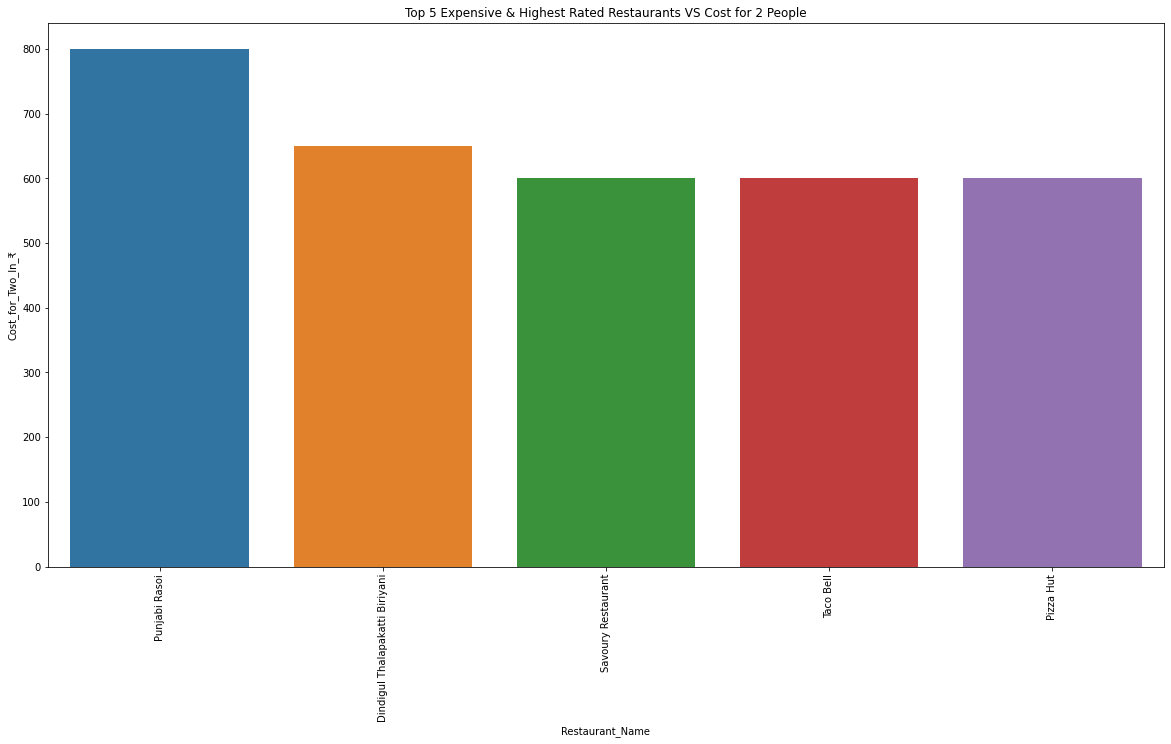

In [107]:
plt.figure(figsize = (20, 10))
sns.barplot(x = df_expensive['Shop_Name'][0:5], y = df_expensive['Cost_for_Two_In_₹'][0:5],
           data = df_expensive)
plt.title('Top 5 Expensive & Highest Rated Restaurants VS Cost for 2 People')
plt.xlabel('Restaurant_Name')
plt.ylabel('Cost_for_Two_In_₹')
plt.xticks(rotation = 90)
plt.show()

In [108]:
#Punjab Rasoi restaurant is the most expensive for 2 people.